In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Generating Sparse Grid Data on LUMI

In [2]:

# import os
# import sys
# pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
# print('PATHAP',pathap)
# sys.path.append(pathap)

# from GENE_ML.gene_ml.samplers.static_sparse_grid import StaticSparseGrid
# from GENE_ML.gene_ml.executors.ScanExecutor import ScanExecutor
# from GENE_ML.gene_ml.runners.GENErunner import GENErunner
# from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

# sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))

# parameters = ['_grp_species_1-omt', '_grp_species_0-omt']
# bounds = [(4,6.7), (2.1,3.5)] #if bounds is a float rather than tuple then the sampler will make that the only value

# #Working fine
# # parameters = ['box-kymin', '_grp_species_1-omt', 'species-omn']
# # bounds = [(0.05,1), (10,70), (5,60)]

# sampler = StaticSparseGrid(parameters=parameters, bounds=bounds, level=7)

# ##Parser
# #The parsers main function is write_input_file
# # wite_input_file takes a parameters file from base_params_path and a set of points in the form of a dict {param1:[point1,point2...], param2:[point1,point2...]...} 
# #  It will then create a parameters file that can scan over all the points.
# base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')
# save_dir = "/temp"
# parser = GENE_scan_parser(save_dir, base_params_path, remote_save_dir=None)

# ## Runner
# #The Runner is responsible for actually running a parameters file on lumi. Its main function is code_run.
# # code_run will take the set of points named samples and parse them into a parameters file.
# #  It then uses ssh to run GENE with this parametres file and a passed sbatch script.
# host = 'lumi' #needs to be configured in /home/<user>/.ssh/config
# sbatch_base_path = os.path.join('sbatch_base')
# guess_sample_wallseconds = 200 # a guess for the number of seconds it takes to run one sample.
# remote_run_dir = '/project/project_462000451/gene/'
# runner = GENErunner(parser, host, sbatch_base_path, guess_sample_wallseconds, remote_run_dir)

# ##Executor
# #The executor will divide the samples into batches; one for each worker. Each batch will be ran in paralell in seperate sbatch jobs. 
# # The executor should alter a base batch script to account for that less samples will be ran. 
# num_workers = 3
# #______________________________________________________________________________________________________________________
# run_name = 'SSG_2p_l4_uq'
# remote_save_dir=f'/scratch/project_462000451/gene_out/gene_auto/{run_name}'
# #______________________________________________________________________________________________________________________
# executor = ScanExecutor(num_workers, sampler, runner, remote_save_dir=remote_save_dir)

################################################

import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.static_sparse_grid import StaticSparseGrid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import config

#!!!Caution Order Changed 17th july 2024
parameters = ['_grp_species_1-omt','_grp_species_0-omt','species-omn']
bounds = [(2.1,3.5), (4,6.7), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value
nominal = [ 5.3871083,2.7954880, 1.5417906]
sampler_ssg = StaticSparseGrid(parameters=parameters,bounds=bounds, level=7)


remote_save_name = "UQ-highprec-ssg"
datagen_ssg = DataGen(config, sampler_ssg, remote_save_name=remote_save_name, ex_id='ssg', guess_sample_wallseconds=200, num_workers=2)


PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations
POINTS SHAPE (84, 3)
 no points for dim = 3 and level = 7 is n = 84


In [3]:
# datagen_ssg.executor.start_runs(ex_id="executor-ssg")

# Pulling Data from LUMI

The data loaded was created by scanning over ion and electron temperature gradients within their margin of uncertainty. 

In [5]:
from GENE_ML.gene_ml.dataset.ScanData import SSG_ScanData
from config import config
data_name = 'SSG_3p_l7_highprec_uq'#run_name#'SSG_2p_l7_uq'#f'SSG_{len(sampler.samples)}s_{len(parameters)}p_uq'#'1000s_2p_uq'
test_percentage=0

#If the data is already loaded from the remote to local .../scanlogs/<data_name> then the host and remote path can be ommitted
SSG_data = SSG_ScanData(data_name, host=config.host, remote_path=datagen_ssg.remote_save_dir, parser=datagen_ssg.parser, sampler=datagen_ssg.sampler, test_percentage=test_percentage)
# prelim_dataset = ScanData(data_name, host=config.host, remote_path=prelim_datagen.remote_save_dir, parser=prelim_datagen.parser, test_percentage=test_percentage)

SSG_data.df

Initialising dataset
SSH PATH lumi1:/scratch/project_462000451/gene_out/gene_auto/UQ-highprec-ssg

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/SSG_3p_l7_highprec_uq
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/SSG_3p_l7_highprec_uq/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/SSG_3p_l7_highprec_uq/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/SSG_3p_l7_highprec_uq/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/SSG_3p_l7_highprec_uq/geneerr_batch-1_scanfiles-0.log

84 SAMPLES RAN OUT OF 94 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 84
NaN PERCENTAGE =  0.0
TEST PERCENTAGE IS 0, NO SPLIT

CHECKING THAT THE SSG SAMPLER AND DATASET HAVE MATCHING ORDER OF SAMPLES...
x [2.8  5.35 1.53] s

,run_time,_grp_species_1-omt,_grp_species_0-omt,species-omn,growthrate,frequency
0,20.693,2.8,5.350000,1.530000,0.120908,0.063865
1,21.455,3.5,5.350000,1.530000,0.122855,0.059025
2,20.623,2.8,6.700000,1.530000,0.149901,0.076659
3,21.575,2.8,5.350000,2.900000,0.096825,-0.032301
4,20.099,2.1,5.350000,1.530000,0.118578,0.068586
...,...,...,...,...,...,...
79,20.401,2.8,4.460746,0.160000,0.092887,0.139023
80,21.765,2.8,6.129423,2.320970,0.131294,0.022265
81,21.597,2.8,4.000000,0.627572,0.086777,0.105094
82,22.230,2.8,6.700000,2.679778,0.138574,0.004851


# Check SSG_data and SSG_sampler store the input in the same order. This is vital for the ssg_poly to function correctly

There is currently a problem when NaNs are discarded


In [6]:
SSG_data.match_sampler(sampler_ssg)
display(SSG_data.df)
print(SSG_data.x[0:5])
print(sampler_ssg.parameters)



CHECKING THAT THE SSG SAMPLER AND DATASET HAVE MATCHING ORDER OF SAMPLES...
x [2.8  5.35 1.53] s [2.8  5.35 1.53]
l 84
RESULT:  True 


 MATCHING THE DATASET SAMPLES TO THE SAMPLERS SAMPLES. THIS IS BECAUSE THEY CAN HAVE DIFFERENT COLUMN CONVENTIONS.
TEST PERCENTAGE IS 0, NO SPLIT
COMPLETE 



,run_time,_grp_species_1-omt,_grp_species_0-omt,species-omn,growthrate,frequency
0,20.693,2.8,5.350000,1.530000,0.120908,0.063865
1,21.455,3.5,5.350000,1.530000,0.122855,0.059025
2,20.623,2.8,6.700000,1.530000,0.149901,0.076659
3,21.575,2.8,5.350000,2.900000,0.096825,-0.032301
4,20.099,2.1,5.350000,1.530000,0.118578,0.068586
...,...,...,...,...,...,...
79,20.401,2.8,4.460746,0.160000,0.092887,0.139023
80,21.765,2.8,6.129423,2.320970,0.131294,0.022265
81,21.597,2.8,4.000000,0.627572,0.086777,0.105094
82,22.230,2.8,6.700000,2.679778,0.138574,0.004851


[[2.8  5.35 1.53]
 [3.5  5.35 1.53]
 [2.8  6.7  1.53]
 [2.8  5.35 2.9 ]
 [2.1  5.35 1.53]]
['_grp_species_1-omt', '_grp_species_0-omt', 'species-omn']


# Fitting Polynomial To GENE SSG Data

In [10]:
from GENE_ML.gene_ml.models.SSG_POLY import SSG_POLY
name='ssg_poly'
poly = SSG_POLY(ssg_sampler=datagen_ssg.sampler, name='ssg_poly1')
poly.train(y=SSG_data.growthrate_train)

mean, var = poly.mean_var_est()
sobol_ind = poly.sobol_ind()

print('Mean and Variance:',mean, var)
print('Sobol Indicies', sobol_ind)


Mean and Variance: 0.11470250108433447 0.0004306815504883209
Sobol Indicies [4.17413845e-03 8.71253226e-01 1.10587483e-01 7.77125825e-05
 3.50185462e-04 1.23967023e-02 1.16055155e-03]


# Loading Random Data For Comparison

In [6]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import config

parser = GENE_scan_parser("temp/")
#data_name = f'{num_samples}s_{len(parameters)}p_uq'#'1000s_2p_uq'
data_name = 'UQ-DEMO-highprec-uniform'#'200s_3p_uq-highprec'
rand_test_percentage=50
remote_save_dir = os.path.join(config.remote_save_base_dir, data_name)
random_data = ScanData(data_name, parser, host=config.host, remote_path=remote_save_dir, test_percentage=rand_test_percentage)
display(random_data.df.head())
print(random_data.x[0])

display(SSG_data.df.head())
print(SSG_data.x[0])

Initialising dataset
SSH PATH lumi1:/scratch/project_462000451/gene_out/gene_auto/UQ-DEMO-highprec-uniform

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/geneerr_batch-0_scanfiles-0.log
**SCAN PATH** /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/scan_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/geneerr_batch-1_scanfiles-0.log
**SCAN PATH** /home/djdaniel/GENE_UQ/scanlogs/UQ-DEMO-highprec-uniform/scan_batch-1_scanfiles-0.log

200 SAMPLES RAN OUT OF 212 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 200
NaN PERCENTAGE =  0.0
SETTING VARIABLES

RANDOMLY SPLITTING DATA I

,run_time,omt2,omt1,omn1,growthrate,frequency
0,20.950,2.484996,4.499231,0.883268,0.099887,0.096284
1,23.222,2.934477,4.539037,1.456623,0.102207,0.058905
2,17.887,3.051881,6.083308,1.966819,0.135272,0.042262
3,20.459,2.858069,5.836209,1.272154,0.132430,0.083876
4,21.970,2.664542,5.275577,0.202671,0.112418,0.144319


[2.484996  4.499231  0.8832677]


,run_time,_grp_species_1-omt,_grp_species_0-omt,species-omn,growthrate,frequency
0,20.693,2.8,5.35,1.53,0.120908,0.063865
1,21.455,3.5,5.35,1.53,0.122855,0.059025
2,20.623,2.8,6.70,1.53,0.149901,0.076659
3,21.575,2.8,5.35,2.90,0.096825,-0.032301
4,20.099,2.1,5.35,1.53,0.118578,0.068586


[2.8  5.35 1.53]


# Testing SSG_Polynomial

In [7]:
import os
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
#results_poly_name = f'random_data_{rand_test_percentage}tp_poly.results'#f'uq_results_{num_samples}s_{len(parameters)}p_{model_name}_{test_percentage}tp' #
results_poly_name = 'ssg_UQ_high_prec.results'
results_poly = Results(results_poly_name)

if os.path.exists(results_poly.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_poly = results_poly.load()
    print(f'{results_poly.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    
    results_poly.growthrate_predict_seen = poly.predict(SSG_data.x)
    results_poly.growthrate_predict_unseen = poly.predict(random_data.x_test)

    results_poly.save()

# results_poly.growthrate_predict_seen = poly.predict(SSG_data.x_train)
# results_poly.growthrate_predict_unseen = poly.predict(random_data.x_test)



COMPUTING RESULTS

PREDICTION WALL TIME FOR 84 POINTS, dd-hh:mm:ss | 00-00:00:13
PREDICTION WALL TIME FOR 100 POINTS, dd-hh:mm:ss | 00-00:00:13


NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


/tmp/ipykernel_150180/922253150.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_residuals.show()


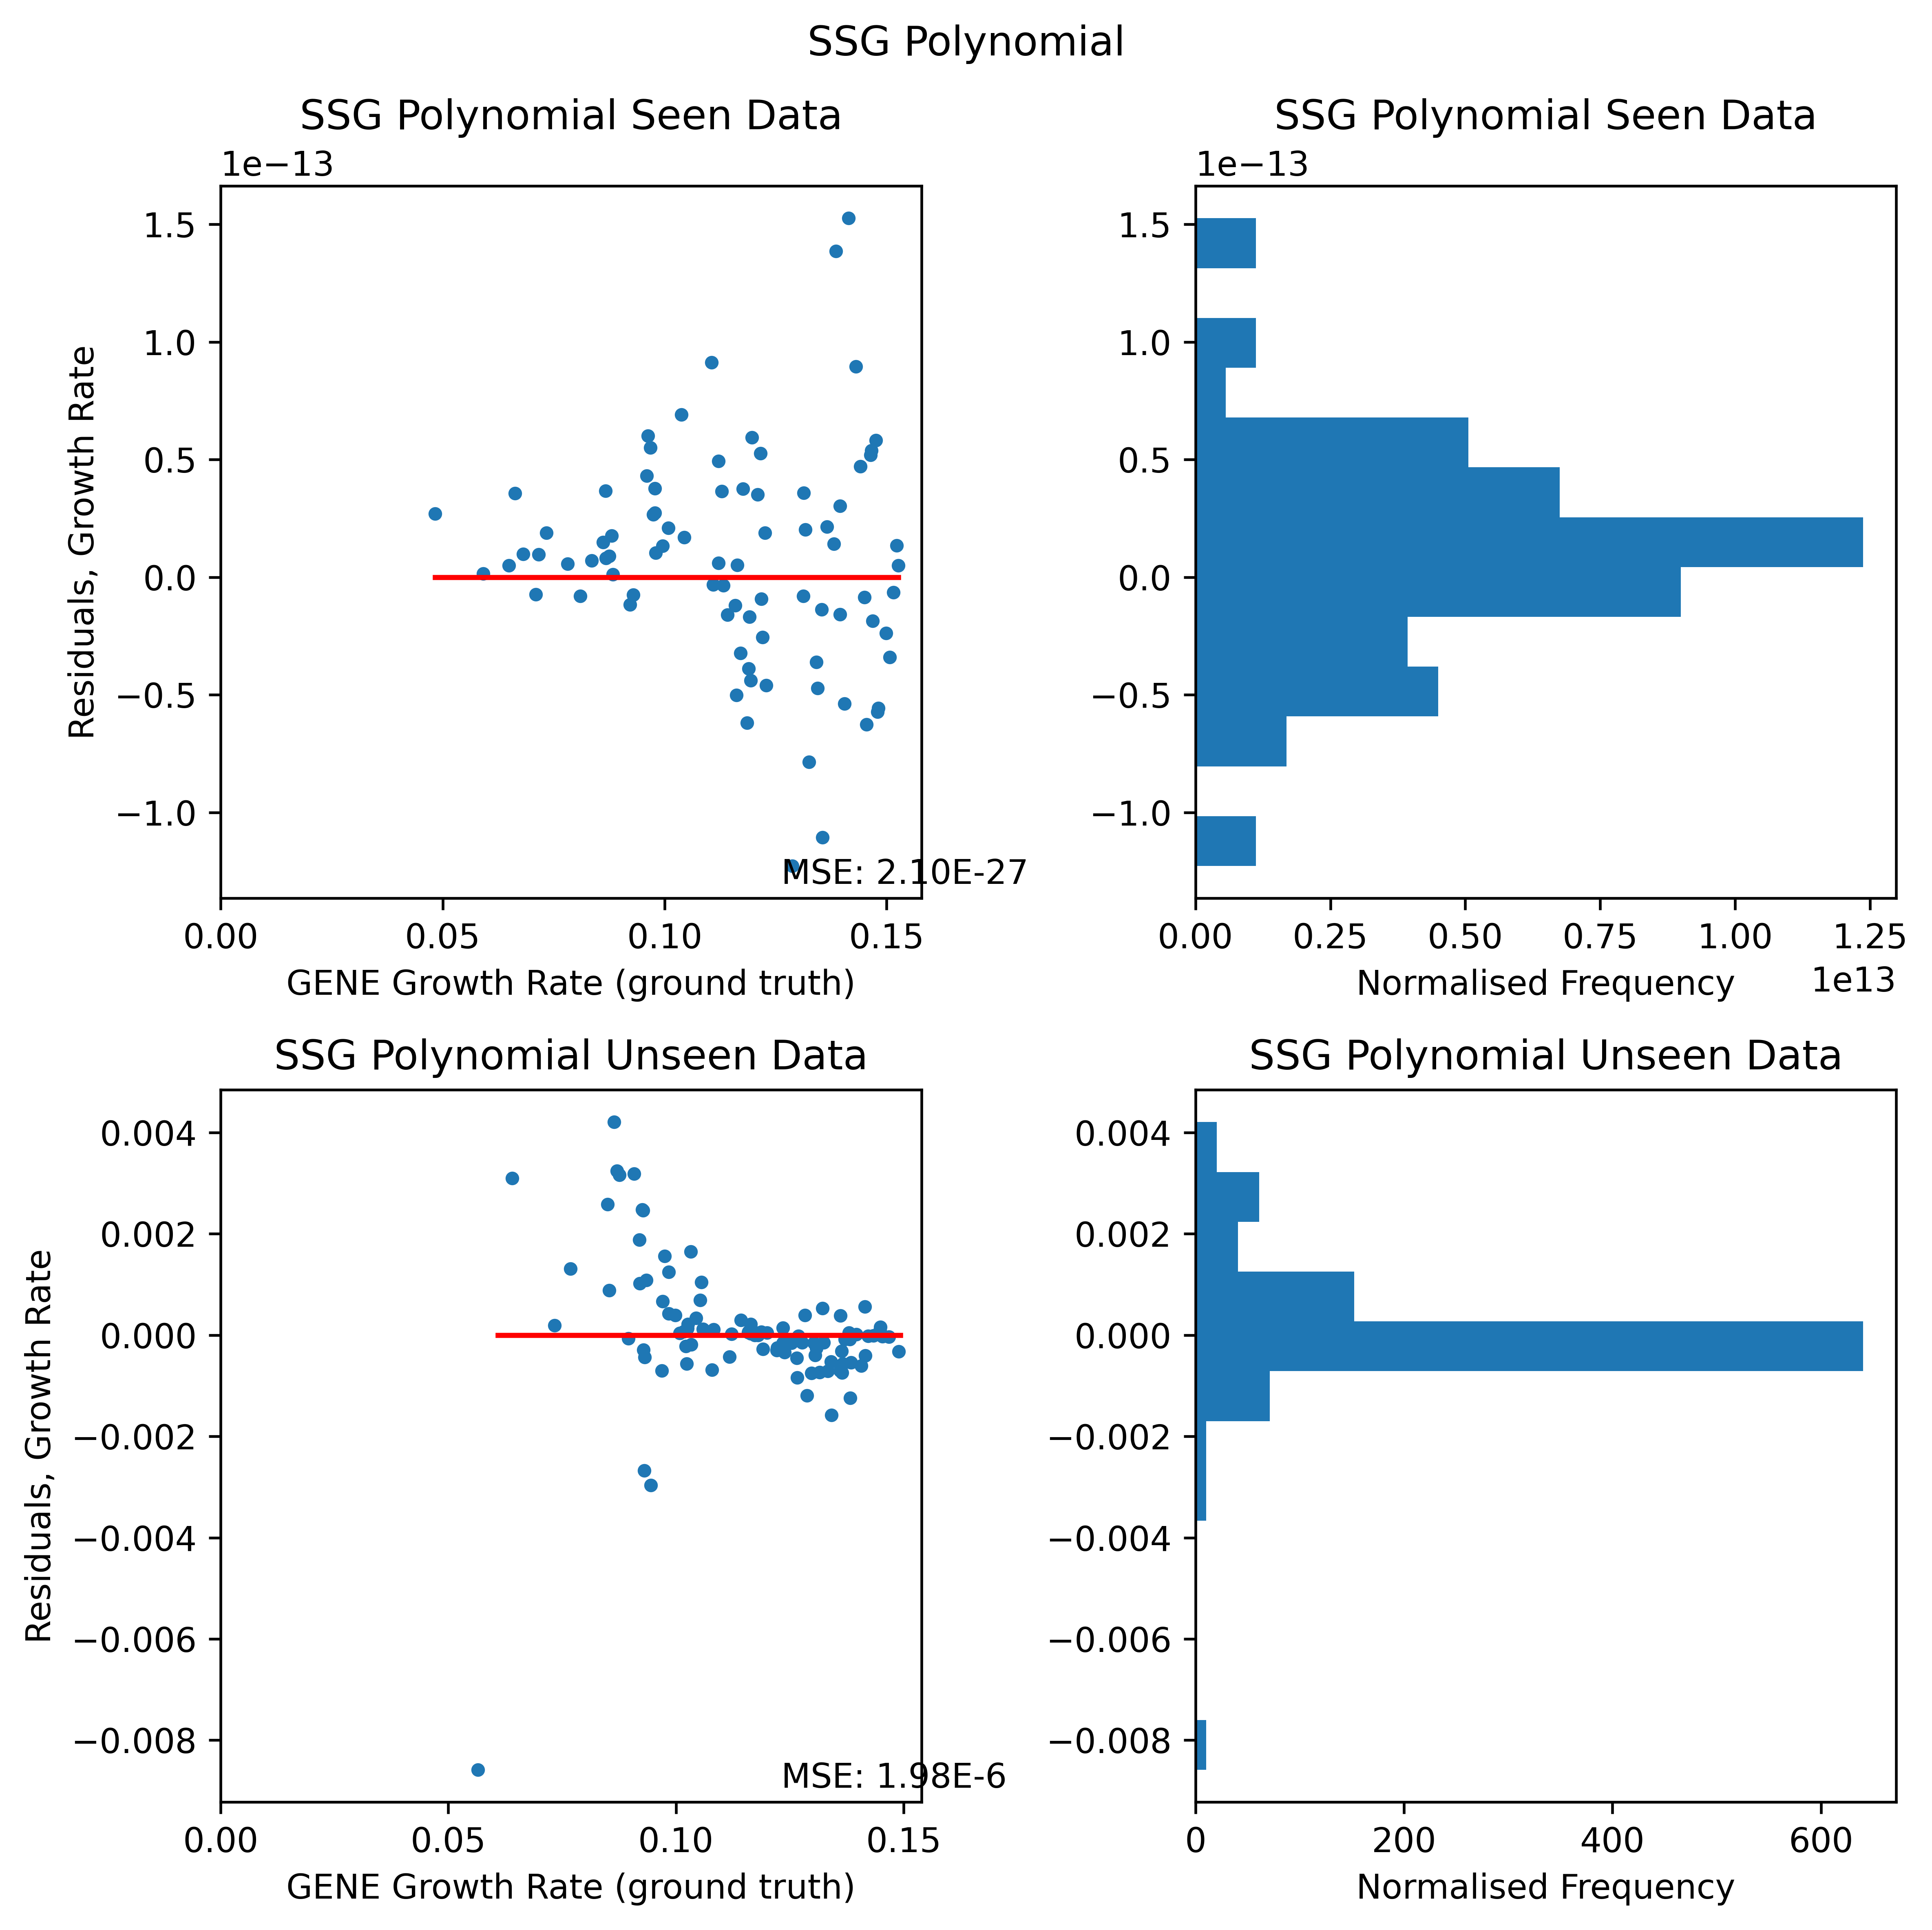

In [8]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

ncol=2
nrow=2
size=4
model_name = 'SSG Polynomial'
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(size*ncol,size*nrow), dpi=600)

vis.residual_plot(ax1, fig_residuals, SSG_data.growthrate_train, results_poly.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, SSG_data.growthrate_train, results_poly.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', bins=13)

vis.residual_plot(ax3, fig_residuals, random_data.growthrate_test, results_poly.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, random_data.growthrate_test, results_poly.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', bins=13)

# ax4.sharex(ax2)

fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()

# Training GPR Surrogate Model 

In [9]:
import os
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
model_name = 'GPR'
#results_gpr_name = f'random_data_{rand_test_percentage}tp_gpr.results'#f'uq_results_{num_samples}s_{len(parameters)}p_{model_name}_{test_percentage}tp' #
results_gpr_name = 'gpr_UQ_high_prec.results'
results_gpr = Results(results_gpr_name)

if os.path.exists(results_gpr.path):
    
    gpr = GPR(name='random_data_gpr.model')
    gpr.train(random_data.x_train, random_data.growthrate_train)
    gpr.tune_hypers(random_data.x_train, random_data.growthrate_train)
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr = results_gpr.load()
    print(f'{results_gpr.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    gpr = GPR(name='random_data_gpr.model')
    gpr.train(random_data.x_train, random_data.growthrate_train)
    gpr.tune_hypers(random_data.x_train, random_data.growthrate_train)

    results_gpr.growthrate_predict_seen, growthrate_predict_seen_errors = gpr.predict(random_data.x_train)
    results_gpr.growthrate_predict_unseen, growthrate_predict_unseen_errors = gpr.predict(random_data.x_test)

    results_gpr.save()

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 94.73476072451719
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (3,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -497.6366856202331
Optimization restart 2/3, f = -509.10284828491
Optimization restart 3/3, f = -509.10284820747364
RESULTING HYPERS:
 
Name : GP regression
Objective : -509.10284828491
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |   0.00

NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_150180/2209195484.py:20: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


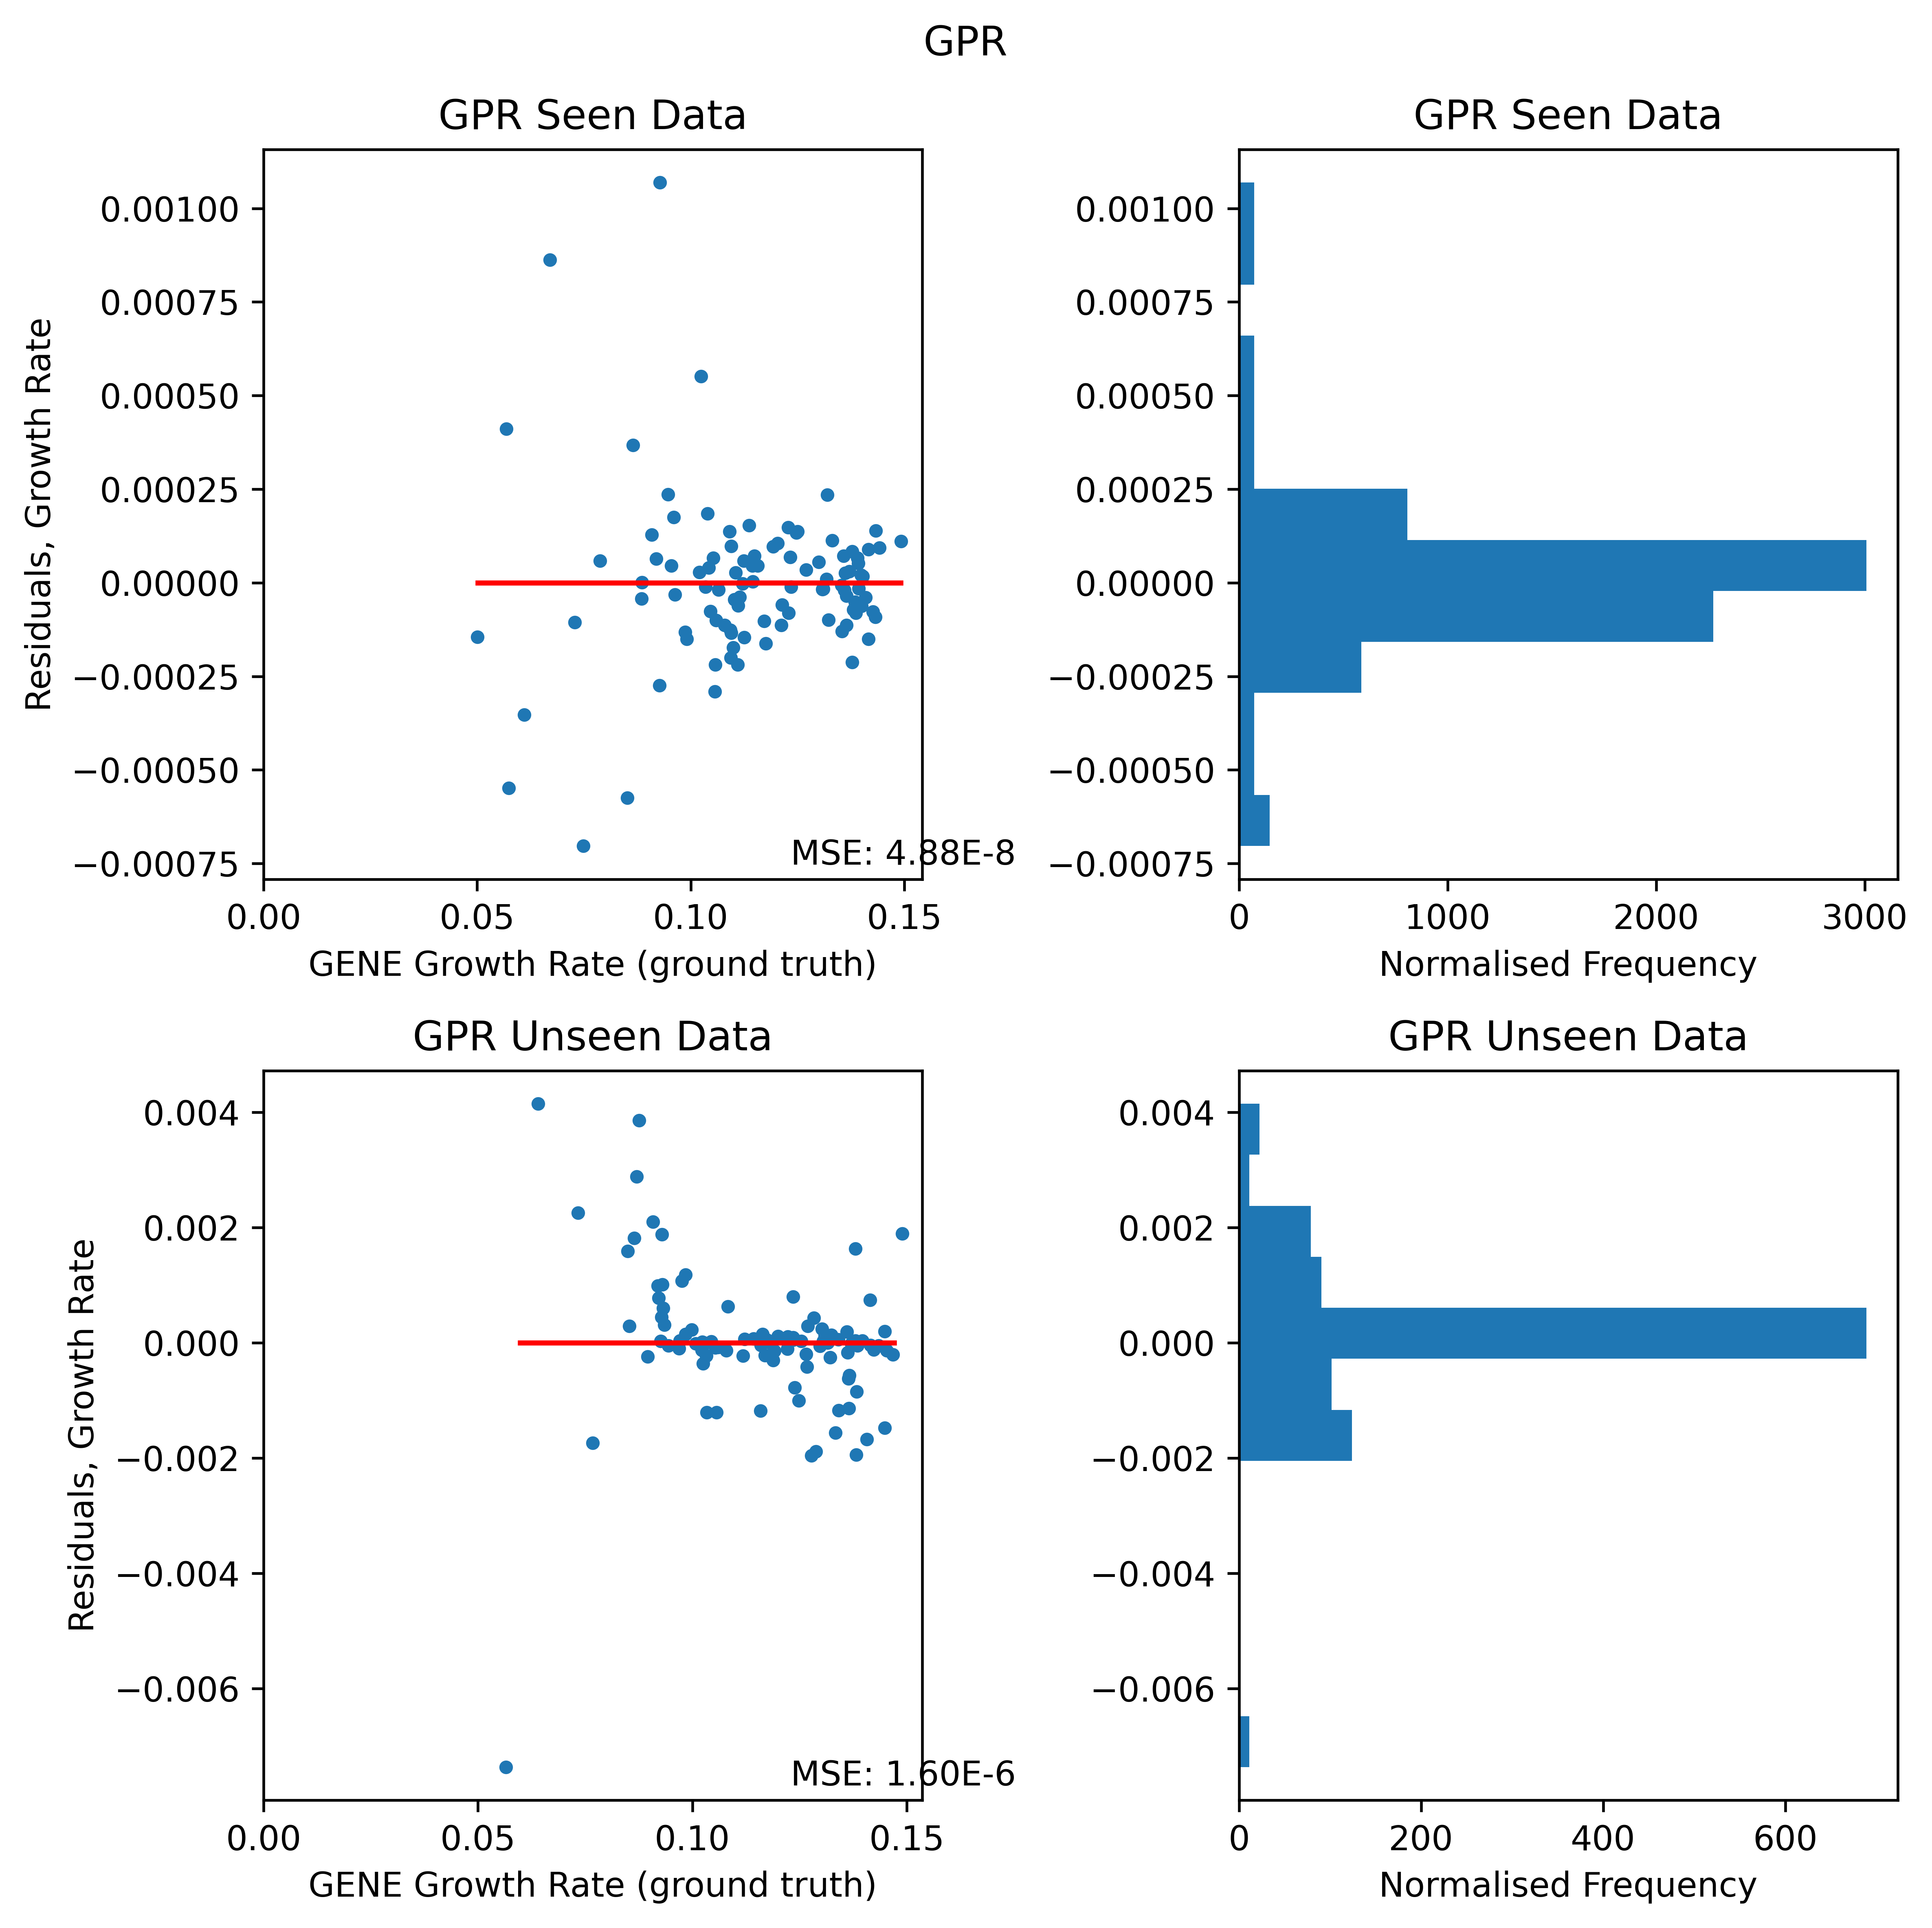

In [10]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

ncol=2
nrow=2
size=4
model_name = 'GPR'
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(size*ncol,size*nrow), dpi=600)
    
vis.residual_plot(ax1, fig_residuals, random_data.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')#, y_pred_err=growthrate_predict_seen_errors)
vis.residual_hist(ax2, fig_residuals, random_data.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', bins=13)

vis.residual_plot(ax3, fig_residuals, random_data.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')#, y_pred_err=growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, random_data.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', bins=13)

# ax4.sharex(ax2)

fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()

In [11]:
import numpy as np
from GENE_ML.gene_ml.samplers.gaussian import Gaussian

num_samples_g = 100000
gaussian = Gaussian(bounds, num_samples_g, parameters)

gaussian.samples_array.shape

(100000, 3)

IONUT MEAN VAR FROM MODEL [0.1147025  0.00043068]
RESULTS UQ GPR EXISTS, LOADING...
GR MAX MIN -0.0103650485581811 0.1737085594126233
True
CONF 95 0.07678892198255012 0.147175426732147
MEAN VAR 0.11628822791465306 0.0003169043425893201
RESULTS UQ POLY DOES NOT EXIST, COMPUTING
PREDICTION WALL TIME FOR 100000 POINTS, dd-hh:mm:ss | 00-00:00:6
PREDICTION WALL TIME FOR 1 POINTS, dd-hh:mm:ss | 00-00:00:5
GR MAX MIN -0.16879777848709 0.5560494067238603
True
COMPUTING CDF
CONF 95 0.07572024094843577 0.14755194398735877
MEAN VAR 0.11641880276102225 0.00032486052221479826


 /tmp/ipykernel_150180/1939152443.py:60: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


KL DIVERGENCE: (0.9415965482570763, 0.33065064513135867, 0.9415965482570763)


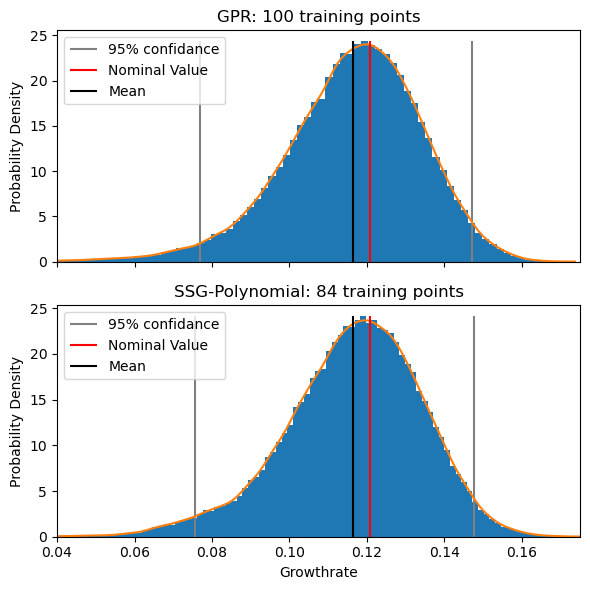

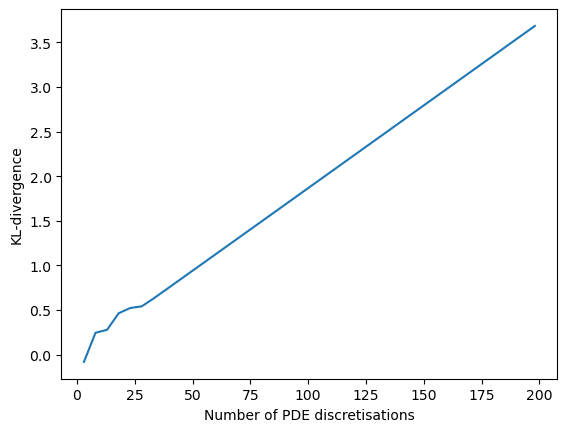

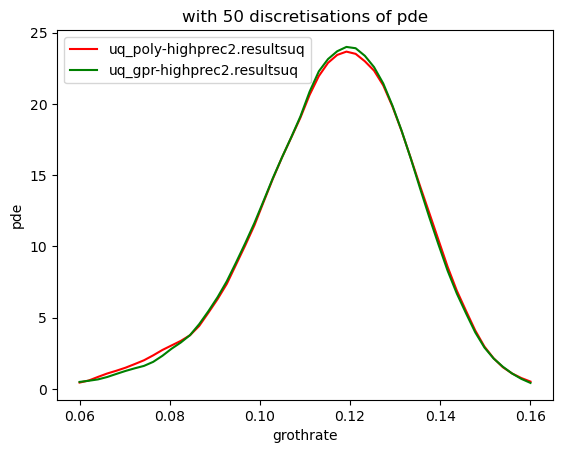

In [34]:
from scipy import stats
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import ResultsUQ
import matplotlib.pyplot as plt

model_pred_mean_var = np.array(poly.mean_var_est())
print('IONUT MEAN VAR FROM MODEL', model_pred_mean_var)
# growthrates, _ = gpr.predict(gaussian.samples_array)

nrow = 2
ncol = 1
width = 6
height = 3
xlim = [0.04,0.175]
fig_uq, [ax1,ax2] = plt.subplots(2,1, figsize=(width*ncol, height*nrow), sharex=True)

results_uq_gpr = ResultsUQ('uq_gpr-highprec2.resultsuq')

if results_uq_gpr.exists():
    print('RESULTS UQ GPR EXISTS, LOADING...')
    results_uq_gpr = results_uq_gpr.load()
else:
    results_uq_gpr.growthrate_predict_uqsamples = gpr.predict(gaussian.samples_array)[0]
    nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((len(bounds),1)).T
    results_uq_gpr.bounds = bounds
    results_uq_gpr.nominal_parameters = nominal_parameters
    results_uq_gpr.growthrate_nominal = gpr.predict(nominal_parameters)[0]
    # lower_bounds = np.array([b[0] for b in bounds]).reshape(len(bounds),1).T
    # results_uq_gpr.growthrate_lower_bound = gpr.predict(lower_bounds)[0]
    # upper_bounds = np.array([b[1] for b in bounds]).reshape(len(bounds),1).T
    # results_uq_gpr.growthrate_upper_bound = gpr.predict(upper_bounds)[0]
    results_uq_gpr.save()

# ax1.set_title('GPR')
results_uq_gpr.vis_forward_uq(ax1, nbins=100, model_name='GPR', xlim=xlim, title='GPR: 100 training points')

results_uq_poly = ResultsUQ('uq_poly-highprec2.resultsuq')
if results_uq_poly.exists():
    print('RESULTS UQ POLY EXISTS, LOADING')
    results_uq_poly = results_uq_poly.load()
else:
    print('RESULTS UQ POLY DOES NOT EXIST, COMPUTING')
    results_uq_poly.growthrate_predict_uqsamples = poly.predict(gaussian.samples_array)
    nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((len(bounds),1)).T
    results_uq_poly.bounds = bounds
    results_uq_poly.nominal_parameters = nominal_parameters
    results_uq_poly.growthrate_nominal = poly.predict(nominal_parameters)
    # lower_bounds = np.array([b[0] for b in bounds]).reshape(len(bounds),1).T
    # results_uq_poly.growthrate_lower_bound = poly.predict(lower_bounds)
    # upper_bounds = np.array([b[1] for b in bounds]).reshape(len(bounds),1).T
    # results_uq_poly.growthrate_upper_bound = poly.predict(upper_bounds)
    results_uq_poly.save()

# ax2.set_title('Polynomial')
results_uq_poly.vis_forward_uq(ax2, nbins=500, model_name='Poly',xlim=xlim, title='SSG-Polynomial: 84 training points')

# fig_residuals.suptitle(model_name)
ax1.set_xlabel('')
fig_uq.tight_layout()
fig_uq.show()

from GENE_ML.gene_ml.results.results import kl_div
# print("KL DIVERGENCE:", kl_div(results_uq_gpr, results_uq_poly))
print("KL DIVERGENCE:", kl_div(results_uq_poly, results_uq_gpr))
# print("KL DIVERGENCE:", kl_div(results_uq_gpr, results_uq_gpr))




In [32]:
len(results_uq_poly.cdf)

1276

# How different is the mean and variance of the two models?

In [32]:
gpr_mean_var = np.array([np.mean(results_uq_gpr.growthrate_predict_uqsamples), np.var(results_uq_gpr.growthrate_predict_uqsamples)])
poly_mean_var = np.array([np.mean(results_uq_poly.growthrate_predict_uqsamples), np.var(results_uq_poly.growthrate_predict_uqsamples)])


print('GPR MEAN AND VAR', gpr_mean_var)
print('POLY MEAN AND VAR', poly_mean_var)
print('DIFFERENCE', np.abs(gpr_mean_var-poly_mean_var))


GPR MEAN AND VAR [0.11628823 0.0003169 ]
POLY MEAN AND VAR [0.1164188  0.00032486]
DIFFERENCE [1.30574846e-04 7.95617963e-06]


# Is the brute force distribution mean and variance the same as Ionut's mean and variance??

In [33]:
# print(results_uq_poly.growthrate_predict_unseen)
poly_mean_var = np.array([np.mean(results_uq_poly.growthrate_predict_uqsamples), np.var(results_uq_poly.growthrate_predict_uqsamples)])
model_pred_mean_var = np.array(poly.mean_var_est())
print('POLY PREDICTIONS MEAN AND VAR', poly_mean_var)
print('MODEL DERIVED ESTIMATE OF MEAN AND VAR',model_pred_mean_var)
print('DIFFERENCE', np.abs(model_pred_mean_var-poly_mean_var))


POLY PREDICTIONS MEAN AND VAR [0.1164188  0.00032486]
MODEL DERIVED ESTIMATE OF MEAN AND VAR [0.1147025  0.00043068]
DIFFERENCE [0.0017163  0.00010582]


# IS IONUT MEAN AND VAR (ie model derived mean and var) JUST THE MEAN AND VAR OF THE GROWTHRATE EVALUATED FOR THE SSG POINTS??

In [15]:
print('\n\nIS IONUT MEAN AND VAR (ie model derived mean and var) JUST THE MEAN AND VAR OF THE GROWTHRATE EVALUATED FOR THE SSG POINTS??')
ssg_mean_var = np.array([np.mean(SSG_data.growthrates), np.var(SSG_data.growthrates)])
print('SSG MEAN AND VAR', ssg_mean_var)
print('DIFFERENCE', np.abs(model_pred_mean_var-ssg_mean_var))
print('answer probably not since there is a sizeable discrepancy')

TEST PREDICTIONS MEAN AND VAR [0.1164188  0.00032486]
MODEL DERIVED ESTIMATE OF MEAN AND VAR [0.1147025  0.00043068]
DIFFERENCE [0.0017163  0.00010582]


IS IONUT MEAN AND VAR (ie model derived mean and var) JUST THE MEAN AND VAR OF THE GROWTHRATE EVALUATED FOR THE SSG POINTS??
SSG MEAN AND VAR [0.11483120238095237, 0.0006668836613757086]
DIFFERENCE [0.0001287 0.0002362]
answer probably not since there is a sizeable discrepancy


In [16]:
import numpy as np
from GENE_ML.gene_ml.samplers.uniform import Uniform

num_samples_u = 100000
uniform = Uniform(bounds, num_samples_u, parameters)

uniform.samples_array.shape

(100000, 3)

GR MAX MIN 0.03993518516902661 0.15026369285094177
False
CONF 95 None None
MEAN VAR 0.11464855852919709 0.00042165141380906296
RESULTS POLY EXISTS, LOADING
GR MAX MIN 0.048629200438702384 0.15268322601505507
False
CONF 95 None None
MEAN VAR 0.11477173211085616 0.00043092748735684076


 /tmp/ipykernel_129777/1050535758.py:48: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


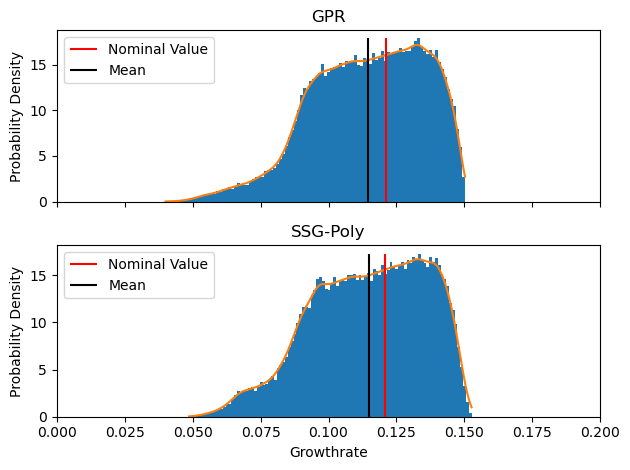

In [28]:
from scipy import stats
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import ResultsUQ

# growthrates, _ = gpr.predict(gaussian.samples_np)

fig_uq, [ax1,ax2] = plt.subplots(2,1, sharex=True)

results_uq_gpr = ResultsUQ('uq_gpr_uniform-highprec.resultsuq')
results_uq_gpr.growthrate_predict_uqsamples = gpr.predict(uniform.samples_array)[0]
nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((len(bounds),1)).T
results_uq_gpr.bounds = bounds
results_uq_gpr.nominal_parameters = nominal_parameters
results_uq_gpr.growthrate_nominal = gpr.predict(nominal_parameters)[0]
lower_bounds = np.array([b[0] for b in bounds]).reshape(len(bounds),1).T
results_uq_gpr.growthrate_lower_bound = gpr.predict(lower_bounds)[0]
upper_bounds = np.array([b[1] for b in bounds]).reshape(len(bounds),1).T
results_uq_gpr.growthrate_upper_bound = gpr.predict(upper_bounds)[0]

# ax1.set_title('GPR')
results_uq_gpr.vis_forward_uq(ax1, nbins=100, model_name='GPR', xlim=[0,0.2], do95conf=False, title='GPR')

results_uq_poly = ResultsUQ('uq_poly_uniform-highprec.resultsuq')
if results_uq_poly.exists():
    print('RESULTS POLY EXISTS, LOADING')
    results_uq_poly = results_uq_poly.load()
else:
    print('RESULTS POLY DOES NOT EXIST, COMPUTING')
    results_uq_poly.growthrate_predict_uqsamples = poly.predict(uniform.samples_array)
    nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((len(bounds),1)).T
    results_uq_poly.bounds = bounds
    results_uq_poly.nominal_parameters = nominal_parameters
    results_uq_poly.growthrate_nominal = poly.predict(nominal_parameters)
    lower_bounds = np.array([b[0] for b in bounds]).reshape(len(bounds),1).T
    results_uq_poly.growthrate_lower_bound = poly.predict(lower_bounds)
    upper_bounds = np.array([b[1] for b in bounds]).reshape(len(bounds),1).T
    results_uq_poly.growthrate_upper_bound = poly.predict(upper_bounds)
    results_uq_poly.save()



# ax2.set_title('Polynomial')
results_uq_poly.vis_forward_uq(ax2, nbins=100, model_name='Poly',xlim=[0,0.2], do95conf=False, title='SSG-Poly')

# fig_residuals.suptitle(model_name)
ax1.set_xlabel('')
fig_uq.tight_layout()
fig_uq.show()


# How different is the mean and variance of the two models?

In [30]:
gpr_mean_var = np.array([np.mean(results_uq_gpr.growthrate_predict_uqsamples), np.var(results_uq_gpr.growthrate_predict_uqsamples)])
poly_mean_var = np.array([np.mean(results_uq_poly.growthrate_predict_uqsamples), np.var(results_uq_poly.growthrate_predict_uqsamples)])


print('GPR MEAN AND VAR', gpr_mean_var)
print('POLY MEAN AND VAR', poly_mean_var)
print('DIFFERENCE', np.abs(gpr_mean_var-poly_mean_var))


GPR MEAN AND VAR [0.11464856 0.00042165]
POLY MEAN AND VAR [0.11477173 0.00043093]
DIFFERENCE [1.23173582e-04 9.27607355e-06]


# Is the distribution mean and variance the same as Ionut's mean and variance??

In [29]:
# print(results_uq_poly.growthrate_predict_unseen)
poly_mean_var = np.array([np.mean(results_uq_poly.growthrate_predict_uqsamples), np.var(results_uq_poly.growthrate_predict_uqsamples)])
model_pred_mean_var = np.array(poly.mean_var_est())
print('TEST PREDICTIONS MEAN AND VAR', poly_mean_var)
print('MODEL DERIVED ESTIMATE OF MEAN AND VAR',model_pred_mean_var)
print('DIFFERENCE', np.abs(model_pred_mean_var-poly_mean_var))


TEST PREDICTIONS MEAN AND VAR [0.11477173 0.00043093]
MODEL DERIVED ESTIMATE OF MEAN AND VAR [0.1147025  0.00043068]
DIFFERENCE [6.92310265e-05 2.45936869e-07]
